# Two Neurons network
### NIERDING Axel 08/05/22
### From Guillaume Saint-Cirgue formation on deep learning

In [1]:

import numpy as np #Numpy provides multidimensional array object, various derived objects (matrices, masked arrays,...) for fast operations on arrays, simulation, etc.
import matplotlib.pyplot as plt #It's a collection of functions to createas plotting area in figure, plots some lines in plotting area, decorate the plot... and work like MATLAB
from sklearn.datasets import make_circles #Generate isotropic gaussian blobs for clustering
plt.style.use('dark_background') # For black background on plot
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
}) # For a gray dark color 
from sklearn.metrics import accuracy_score

## Initialisation 

![](Pics/Initialisation.png)

In [2]:
def initialisation (n0, n1, n2):

    W1 = np.random.randn(n1, n0) 
    b1 = np.random.randn(n1, 1) 
    W2 = np.random.randn(n2, n1) 
    b2 = np.random.randn(n2, 1) 

    parameters = {#Dictionnary
            'W1' : W1,
            'b1' : b1,
            'W2' : W2,
            'b2' : b2
    }
    return (parameters)


## Foward propagation

![](Pics/FowardPropagation.png)

In [3]:
def foward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {#Dictionnary
        'A1' : A1,
        'A2' : A2
    }


    return activations

## Cost function

In [37]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1-y) * np.log(1 - A + epsilon)) 

## Back propagation

<img src="Pics/BackPropagation.png" width="400" height="400" />

In [4]:
def back_propagation(X, y, activations, parameters):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parameters['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {#Dictionnary
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }


   
    return(gradients)

## Update the model

![](Pics/Update.png)

In [7]:
def update(gradients, parameters, learning_rate):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']


    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {#Dictionnary
            'W1' : W1,
            'b1' : b1,
            'W2' : W2,
            'b2' : b2
    }
    
    return(parameters)

## Predict function

![](Pics/Predict.png)

In [8]:
def predict(X, parameters):
    activations = foward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

## Neural network with 2 neurons

![](Pics/Model.png)

In [45]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):
    
    #initiation W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parameters = initialisation(n0, n1, n2)#The initilisation function

    
    train_Loss = []#Empty list which growth with learning
    train_acc = []

    for i in range(n_iter):# Learning loop (100 iterations here)
        
        activations = foward_propagation(X_train, parameters)# Result of Model
        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)#Update (W,b)

        if i %10 == 0:
            #Train
            train_Loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parameters)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
        
        
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    plt.plot(train_Loss, label='train loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()#Display figure

    return parameters


## Make more complex data 

dimension de X: (2, 100)
dimension de y: (1, 100)


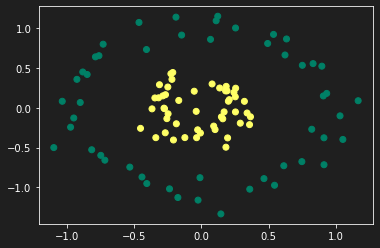

In [25]:
X, y = make_circles (n_samples = 100, noise=0.1, factor=0.3, random_state=0) #Number of points equally divided among clusters ; number of features for each sample ; number of centers to generate ; Determines random number generation for dataset creation
X = X.T
y = y.reshape((1, y.shape[0])) 

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[0,:], X[1, :], c=y, cmap='summer')
plt.show()#Display plot

## Train the model

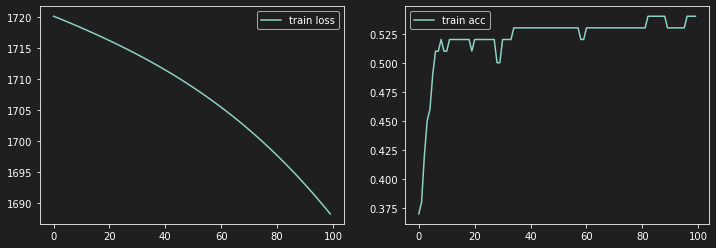

In [46]:
parameters = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)

## Result

![](Pics/Prediction.png)